# This is the title of this notebook


## Documentation and Imports


Created on 21/08/2023

Author: Valentin Laplaud

General descritpion of the code here


In [1]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]
import gc
gc.collect()

import pandas as pd
import numpy as np
from scipy.interpolate import LinearNDInterpolator as Linterp, NearestNDInterpolator as Ninterp
import datetime

 
# importing required libraries
import matplotlib as mpl
import matplotlib.pyplot as plt


COLOR = 'black'
COLOR2 = 'white'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['axes.labelsize'] =  'large'

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2


import sys

sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\LaReunionProject\Python')
import VallapFunc_LR as vf
import StatsFunctions_LR as sf

from Main_LR import MonthAvg, WeatherInterp


DataPath = r'd:/Users/laplaud/Desktop/PostDoc/Data/LaReunionProject'

##  Data management

### Retrieving & storing plant data

In [2]:
# # Loading global data on stations (2022 collect)
# StationData = pd.read_excel(DataPath + '/DataMathieu/Data_globosa_SD3_VL.xlsx',
#                   sheet_name='Données stations normées V2',index_col = 0,
#                   usecols = ['Station','Date', 'Latitude','Longitude','Altitude (m)','Orientation','Verticalité (°C)'])

# StationData.to_csv(DataPath + '/DataCSV/StationData.csv', index_label = 'Station')

In [3]:
# # Loading colonies quantifications based on image analysis
# CupData = pd.read_excel(DataPath + '/DataMathieu/Data_globosa_SD3_VL.xlsx',
#                   sheet_name='Mesure par colonie',index_col = 0,
#                   usecols = ['Nom échantillon','Densité corbeilles (unit/mm²)','Total corbeilles',
#             'Largeur thalle (mm)','Aire corbeille (mm²)', 'Y centroïde-Y centre','Grand diamètre ellipse coupe (mm)',
#             'Pourcentage de lumière sous la canopée (%)','Distance à la plus proche zone apicale (mm)'])

# CupData.to_csv(DataPath + '/DataCSV/CupData.csv', index_label = 'Nom échantillon')

In [4]:
# StationData = pd.read_csv(DataPath + '/DataCSV/StationData.csv',index_col = 'Station')
# CupData = pd.read_csv(DataPath + '/DataCSV/CupData.csv',index_col ='Nom échantillon' )

# FullPlantData2022 = pd.merge(CupData,StationData, left_index=True, right_index=True)


# FullPlantData2022['Latitude (km)'] = FullPlantData2022['Latitude'].apply(lambda x : (x+21.1)*111.139)
# FullPlantData2022['Longitude (km)'] = FullPlantData2022['Longitude'].apply(lambda x : (x-55.48)*111.139)
# FullPlantData2022['Altitude (km)'] = FullPlantData2022['Altitude (m)'].apply(lambda x : x/1000)

# FullPlantData2022.to_csv(DataPath + '/DataCSV/FullPlantData2022.csv', index_label = 'Station')


### Retrieving weather data

In [5]:
# # Loading 01-2022 to 08-2022 meteological data

# RainData = pd.read_excel(DataPath + '/DataMeteo/Rain2022.xls',
#                   usecols = ['STATION','LATITUDE','LONGITUDE','ALTITUDE','DATE','RR','RRAB'])

# RainData['MONTH'] = RainData['DATE'].apply(lambda x : x.month)

# RainData.to_csv(DataPath + '/DataCSV/RainData2022.csv')


# HumidityData = pd.read_excel(DataPath + '/DataMeteo/Humidity2022.xls',
#                   usecols = ['STATION','LATITUDE','LONGITUDE','ALTITUDE','DATE','UMM'])

# HumidityData['MONTH'] = HumidityData['DATE'].apply(lambda x : x.month)

# HumidityData.to_csv(DataPath + '/DataCSV/HumidityData2022.csv')


# TemperatureData = pd.read_excel(DataPath + '/DataMeteo/Temperatures2022.xls',
#                   usecols = ['STATION','LATITUDE','LONGITUDE','ALTITUDE','DATE','TM','TAMPLIM'])

# TemperatureData['MONTH'] = TemperatureData['DATE'].apply(lambda x : x.month)

# TemperatureData.to_csv(DataPath + '/DataCSV/TemperatureData2022.csv')


# SunshineData = pd.read_excel(DataPath + '/DataMeteo/SunshineLevels2022.xls',
#                   usecols = ['STATION','LATITUDE','LONGITUDE','ALTITUDE','DATE','GLOT'])

# SunshineData['MONTH'] = SunshineData['DATE'].apply(lambda x : x.month)

# SunshineData.to_csv(DataPath + '/DataCSV/SunshineData2022.csv')



### Formating weather data

In [20]:

# SunshineData2022 = pd.read_csv(DataPath + '/DataCSV/SunshineData2022.csv',index_col = 0)

# TemperatureData2022 = pd.read_csv(DataPath + '/DataCSV/TemperatureData2022.csv',index_col = 0)

# HumidityData2022 = pd.read_csv(DataPath + '/DataCSV/HumidityData2022.csv',index_col = 0)

# RainData2022 = pd.read_csv(DataPath + '/DataCSV/RainData2022.csv',index_col = 0)


In [21]:
# # Averaging meteo data over chosen month and pooling all variables in one dataframe

# dfs = [SunshineData2022,TemperatureData2022,HumidityData2022,RainData2022]
# AllVars = [['GLOT'],['TM','TAMPLIM'],['UMM'],['RR','RRAB']]
# monthlist = [1,2,3,4] # 1 - 12 = january - december

# WeatherData2022 = MonthAvg(dfs,AllVars,monthlist)

# WeatherData2022['Latitude (km)'] = WeatherData2022['LATITUDE'].apply(lambda x : (x+21.1)*111.139)
# WeatherData2022['Longitude (km)'] = WeatherData2022['LONGITUDE'].apply(lambda x : (x-55.48)*111.139)
# WeatherData2022['Altitude (km)'] = WeatherData2022['ALTITUDE'].apply(lambda x : x/1000)

# WeatherData2022.to_csv(DataPath + '/DataCSV/WeatherData2022.csv', index = False)

##  Run analysis

### Load data

In [22]:
WeatherData2022 = pd.read_csv(DataPath + '/DataCSV/WeatherData2022.csv', index_col = 'STATION')

FullPlantData2022 = pd.read_csv(DataPath + '/DataCSV/FullPlantData2022.csv', index_col = 'Station')

### Location of weather station and collection sites

In [9]:
# # for creating a responsive plot
# %matplotlib 
# ax = plt.figure(figsize=(5,5),dpi = 200).add_subplot(projection='3d')

# ax.scatter(WeatherData2022['Longitude (m)']/1000,WeatherData2022['Latitude (m)']/1000,WeatherData2022['ALTITUDE']/1000,label = 'Weather station')
# ax.scatter(FullPlantData2022['Longitude (m)']/1000,FullPlantData2022['Latitude (m)']/1000,FullPlantData2022['Altitude (m)']/1000, label = 'Collection site')

# ax.set_title('(0,0) -> Piton des neiges')
# ax.set_xlabel('Longitude (km)')
# ax.set_xlim([-30,42])
# ax.set_ylabel('Latitude (km)')
# ax.set_ylim([-35,30])
# ax.set_zlabel('Altitude (km)')
# ax.set_zlim([0,6])

# ax.legend()

### Correlations inside plant dataset

In [10]:
# %matplotlib inline

# sf.Corr([FullPlantData2022],['Globosa2022'],columns = ['Latitude (km)','Longitude (km)',
#             'Altitude (km)','Densité corbeilles (unit/mm²)',
#             'Largeur thalle (mm)','Aire corbeille (mm²)',
#             'Pourcentage de lumière sous la canopée (%)'],
#         columnslabels = ['Lat (km)','Long (km)','Alt (km)','Density (u/mm²)',
#             'ThalWidth (mm)','Cup area (mm²)','CanopyLight (%)'],
#        DataFilter = 'on',SigLvl = 0.05, CCLvl = 0.0, fsize = 5, dpival = 200, labelscale = 0.7,annotsize = 7) 

### Correlation in weather dataset

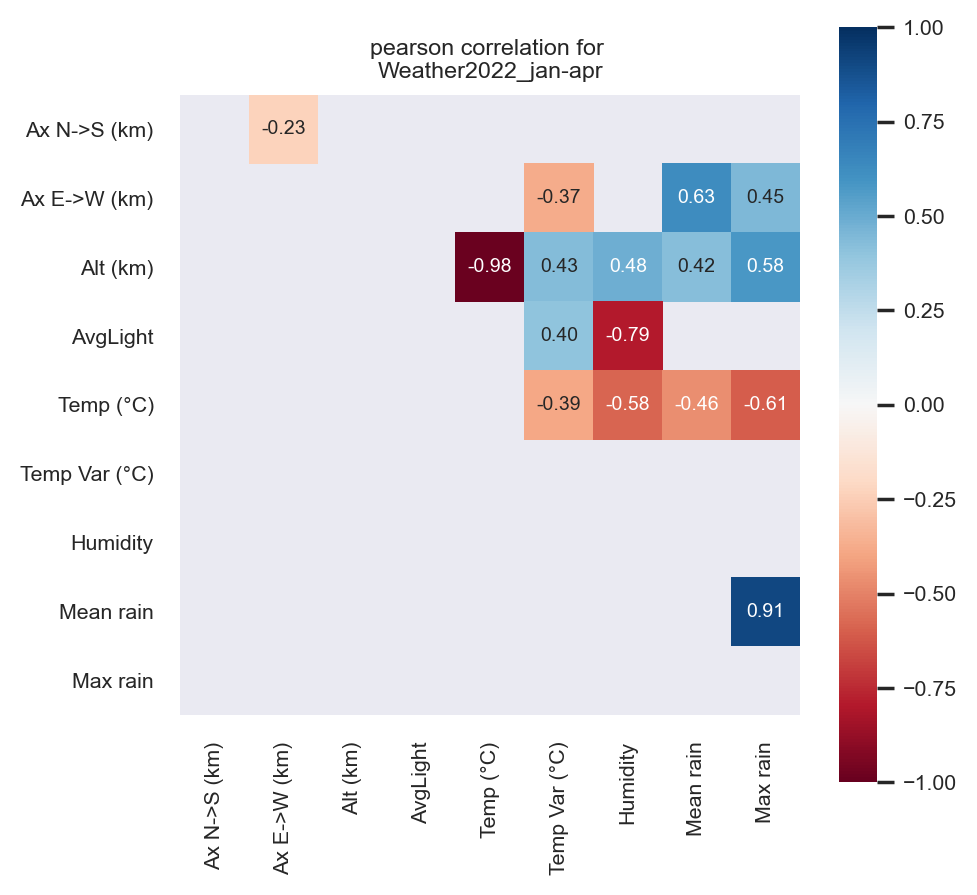

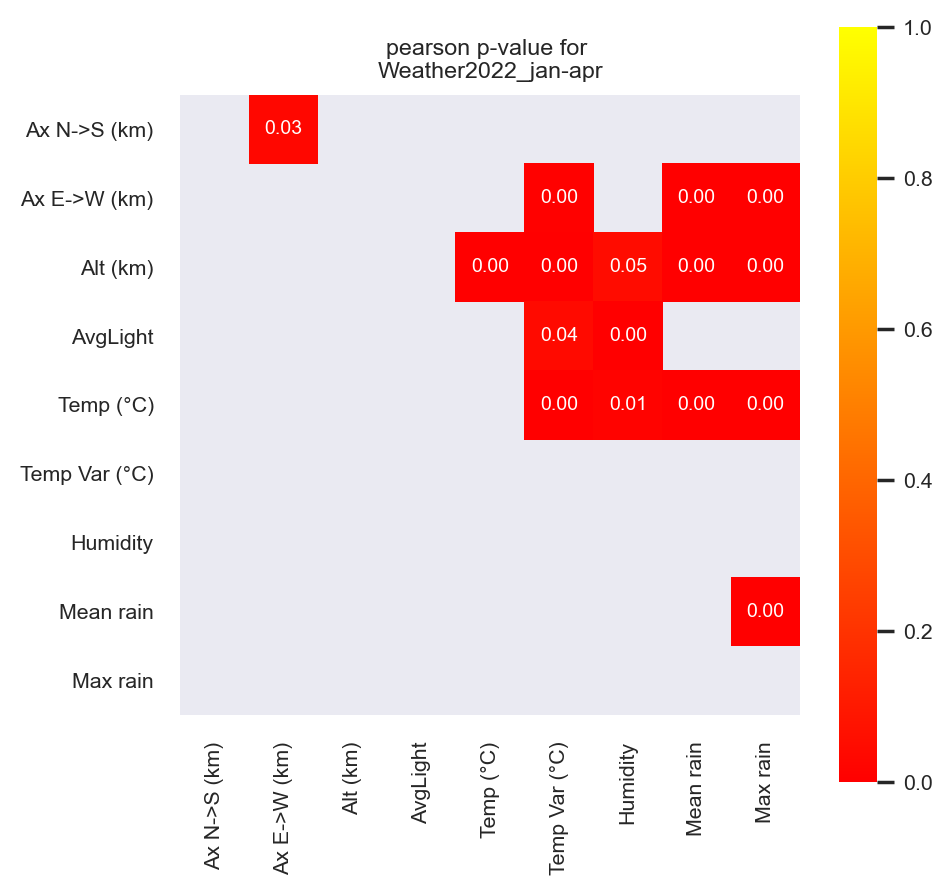

In [23]:
# %matplotlib inline

sf.Corr([WeatherData2022],['Weather2022_jan-apr'],
        columns = ['Latitude (km)','Longitude (km)','Altitude (km)', 'GLOT_AVG','TM_AVG','TAMPLIM_AVG','UMM_AVG','RR_AVG','RRAB_AVG'],
        columnslabels = ['Ax N->S (km)','Ax E->W (km)', 'Alt (km)', 'AvgLight','Temp (°C)','Temp Var (°C)','Humidity','Mean rain','Max rain'],
        corrmethod='pearson',
       DataFilter = 'on',SigLvl = 0.05, CCLvl = 0.0, fsize = 5, dpival = 200, labelscale = 0.7, annotsize = 7) 

### Interpolation of weather data on plants location

In [12]:
PlantWeatherData2022_N = WeatherInterp(FullPlantData2022.copy(deep = True),WeatherData2022,
                                       ['RR_AVG','RRAB_AVG','UMM_AVG','TM_AVG','TAMPLIM_AVG','GLOT_AVG']
                                       ,interpmethod='nearest')

PlantWeatherData2022_L = WeatherInterp(FullPlantData2022.copy(deep = True),WeatherData2022,
                                       ['RR_AVG','RRAB_AVG','UMM_AVG','TM_AVG','TAMPLIM_AVG','GLOT_AVG']
                                       ,interpmethod='linear')

### Correlation between plant and weather caracteristics

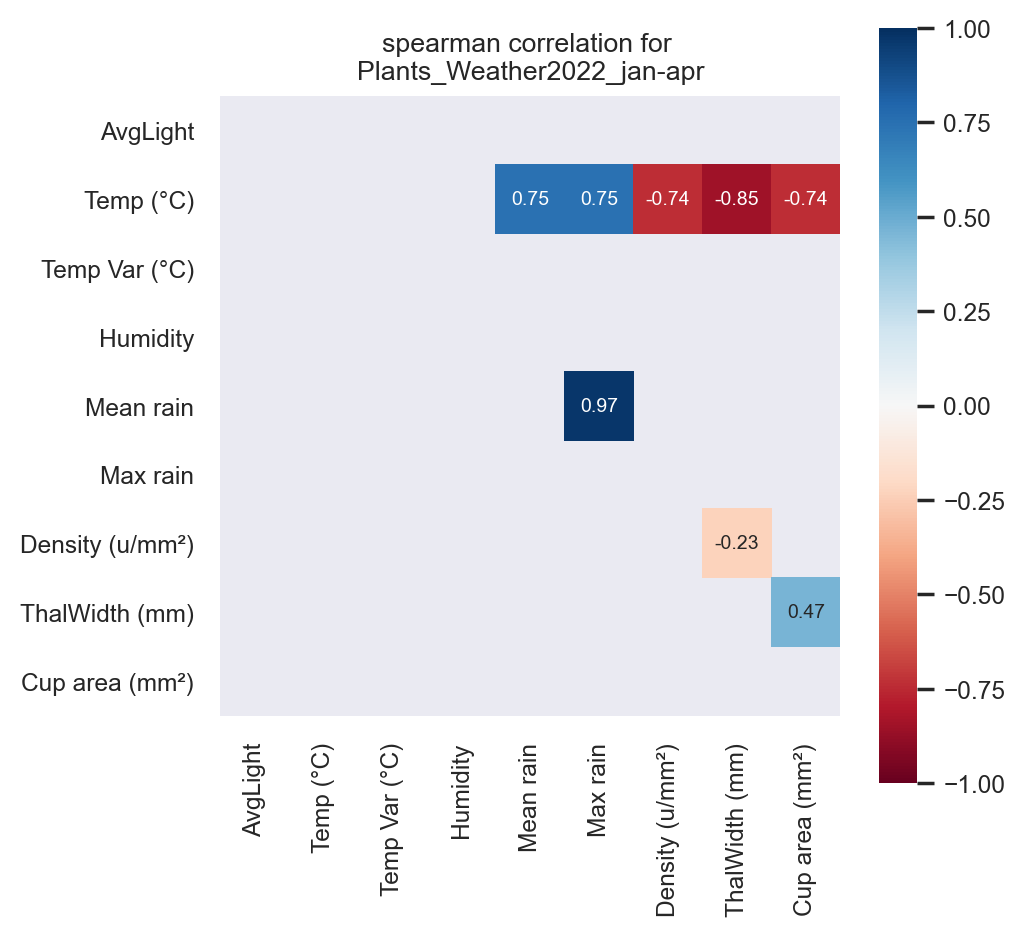

In [18]:
sf.Corr([PlantWeatherData2022_L],['Plants_Weather2022_jan-apr'],
        columns = ['GLOT_AVG','TM_AVG','TAMPLIM_AVG','UMM_AVG','RR_AVG','RRAB_AVG','Densité corbeilles (unit/mm²)',
                   'Largeur thalle (mm)','Aire corbeille (mm²)'],
        columnslabels = ['AvgLight','Temp (°C)','Temp Var (°C)','Humidity','Mean rain','Max rain',
                        'Density (u/mm²)','ThalWidth (mm)','Cup area (mm²)'],
        corrmethod='spearman',PlotCorr = True, PlotP = False, PlotFits = False,
       DataFilter = 'on',SigLvl = 0.1, CCLvl = 0.0, fsize = 5, dpival = 200, labelscale = 0.8, annotsize = 7) 

# columns = ['Densité corbeilles (unit/mm²)','Largeur thalle (mm)','Aire corbeille (mm²)',
#            'Grand diamètre ellipse coupe (mm)','Pourcentage de lumière sous la canopée (%)'],
#         columnslabels = ['Density (u/mm²)','ThalWidth (mm)','Cup area (mm²)','CupDiam (mm)','CanopyLight (%)']

# sf.Corr([PlantWeatherData2022_L],['Plants_Weather2022_jan-apr'],
#         columns = ['GLOT_AVG','TM_AVG','TAMPLIM_AVG','UMM_AVG','RR_AVG','RRAB_AVG'],
#         columnslabels = ['AvgLight','Temp (°C)','Temp Var (°C)','Humidity','Mean rain','Max rain'],
#         corrmethod='spearman',PlotCorr = True, PlotP = False, PlotFits = False,
#        DataFilter = 'on',SigLvl = 2, CCLvl = 0.0, fsize = 5, dpival = 200, labelscale = 0.9, annotsize = 8) 

## Test Zone

In [14]:
WeatherData2022['UMM_AVG'].values

array([ nan,  nan, 91.5,  nan,  nan, 78.5,  nan,  nan, 94.5, 73.5,  nan,
        nan,  nan,  nan,  nan,  nan, 82.5,  nan,  nan, 84.5,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, 86.5,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan, 92.5,  nan,  nan,  nan, 84.5,  nan, 76.5,  nan,
        nan, 77. ,  nan,  nan, 82. , 78. ,  nan,  nan,  nan,  nan, 87. ,
       80.5,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 93. ,
        nan,  nan,  nan, 85. ,  nan,  nan,  nan,  nan,  nan])

In [15]:

len(np.unique(WeatherData2022['UMM_AVG'].values))

17

In [16]:
len(HumidityData2022['UMM'].values)

136

In [17]:
136/6

22.666666666666668